# Author: Стурейко Игорь
## Project: Geekbrains.MatStat
## Lesson 07 - Линейная регрессия. Однофакторный дисперсионный анализ
## Date: 2020-07-14

In [100]:
import numpy as np
import itertools
from scipy import stats
from matplotlib import pyplot as plt

## 1. Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

In [6]:
X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [71]:
a = np.array(range(X.shape[1])) # массив индексов
Res = [(0,0), 0] # результат
for s in list(itertools.combinations(a, 2)): #перебираем все комбинации признаков
    x1 = X[:, s] # выбираем два признака
    x1 = np.hstack((np.ones((x1.shape[0], 1)), x1)) # дополняем единицами
    XTX = x1.T.dot(x1) # считаем ХТХ
    XTX_inv = np.linalg.inv(XTX) # обращаем 
    b = XTX_inv.dot(x1.T).dot(y) #считаем коэффициенты
    z1 = x1.dot(b) # считаем предсказанные значения
    e1 = y - z1 # считаем ошибки
    R1 = 1 - e1.var() / y.var() # коэффицент детерминации
    if R1 > Res[1]:
        Res[0] = s
        Res[1] = R1
print(f'Максимальный коэффициент детерминации: {round(Res[1], 4)} при сочетании признаков {Res[0]}')

Максимальный коэффициент детерминации: 0.7634 при сочетании признаков (0, 2)


In [132]:
n = x1.shape[0] # параметры распределения Фишера
m = 1
k1 = m 
k2 = n - m - 1
alpha = 0.05 # уровень занчимости по умолчанию
t = stats.f.ppf(1 - alpha, k1, k2) # критическая обоасть
F = (R1 / k1) / ((1 - R1) / k2) # значение статистики
if F > t: 
    print('Статистика попала в критическую область, уравнение регрессии не признаётся значимым.')
else:
    print('Статистика не попала в критическую область, уравнение регрессии описывает зависимость данных.')

Статистика попала в критическую область, уравнение регрессии не признаётся значимым.


## 2. Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

Предполагаю, что нужно посчитать попадание статистики в критическую область определенной по конверсии. НО прошу Вас на разборе обсудить этот момент подробнее.

In [140]:
alpha = 0.05 # уровень занчимости по умолчанию
A = 2509
a = 77
B = 1465
b=60

# Конверсия
con_aA = a / A
con_bB = b / B
con_AB = (a + b) / (A + B)
print(f'con_A:{round(con_A, 4)}, con_B:{round(con_B, 4)}, con_AB:{round(con_AB, 4)}')

F = con_AB / con_aA    # Статистика

# Критическая область
t1 = stats.norm.ppf(alpha/2)
t2 = stats.norm.ppf(1 - alpha/2)

if F < t1 or F > t2:
    print('Отличие является значимым')
else:
    print('Нулевая гипотеза подтвердилась, конверсия не является значимой')

con_A:0.0307, con_B:0.041, con_AB:0.0345
Нулевая гипотеза подтвердилась, конверсия не является значимой


## 3. Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

По каждой паре выборок посчитайте:
* выборочное среднее и дисперсию каждой выборки,
* коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [75]:
s = { "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68], "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74], "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73], "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0], "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89] }

In [98]:
for i in range(1, 5):
    x = np.array(s["x"+str(i)])
    y = np.array(s["y"+str(i)])
    print(f'Среднее x{i}: {x.mean()}, среднее y{i}: {round(y.mean(), 2)}')
    print(f'Дисперсия x{i}: {x.mean()}, дисперсия y{i}: {round(y.mean(), 2)}')
    print(f'Коэффициент корреляции Пирсона: {round(np.corrcoef(x, y)[0, 1], 4)}')
    b1 = np.cov(x, y, ddof=0)[0, 1] / np.var(x, ddof=0)
    b0 = y.mean() - b1 * x.mean()
    print(f'Коэффициенты линейной регрессии: b0 = {round(b0, 4)}, b1 = {round(b1, 4)}\n')

Среднее x1: 9.0, среднее y1: 7.5
Дисперсия x1: 9.0, дисперсия y1: 7.5
Коэффициент корреляции Пирсона: 0.8164
Коэффициенты линейной регрессии: b0 = 3.0001, b1 = 0.5001

Среднее x2: 9.0, среднее y2: 7.5
Дисперсия x2: 9.0, дисперсия y2: 7.5
Коэффициент корреляции Пирсона: 0.8162
Коэффициенты линейной регрессии: b0 = 3.0009, b1 = 0.5

Среднее x3: 9.0, среднее y3: 7.5
Дисперсия x3: 9.0, дисперсия y3: 7.5
Коэффициент корреляции Пирсона: 0.8163
Коэффициенты линейной регрессии: b0 = 3.0025, b1 = 0.4997

Среднее x4: 9.0, среднее y4: 7.5
Дисперсия x4: 9.0, дисперсия y4: 7.5
Коэффициент корреляции Пирсона: 0.8165
Коэффициенты линейной регрессии: b0 = 3.0017, b1 = 0.4999



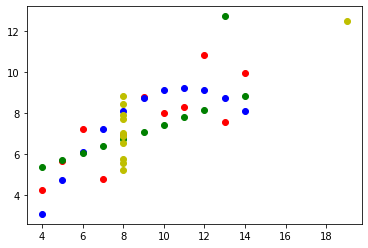

In [123]:
fig = plt.figure()
col = ['r', 'b', 'g', 'y']
for i in range(1, 5):
    x = np.array(s["x"+str(i)])
    y = np.array(s["y"+str(i)])
    plt.scatter(x, y, c=col[i-1])
plt.show()

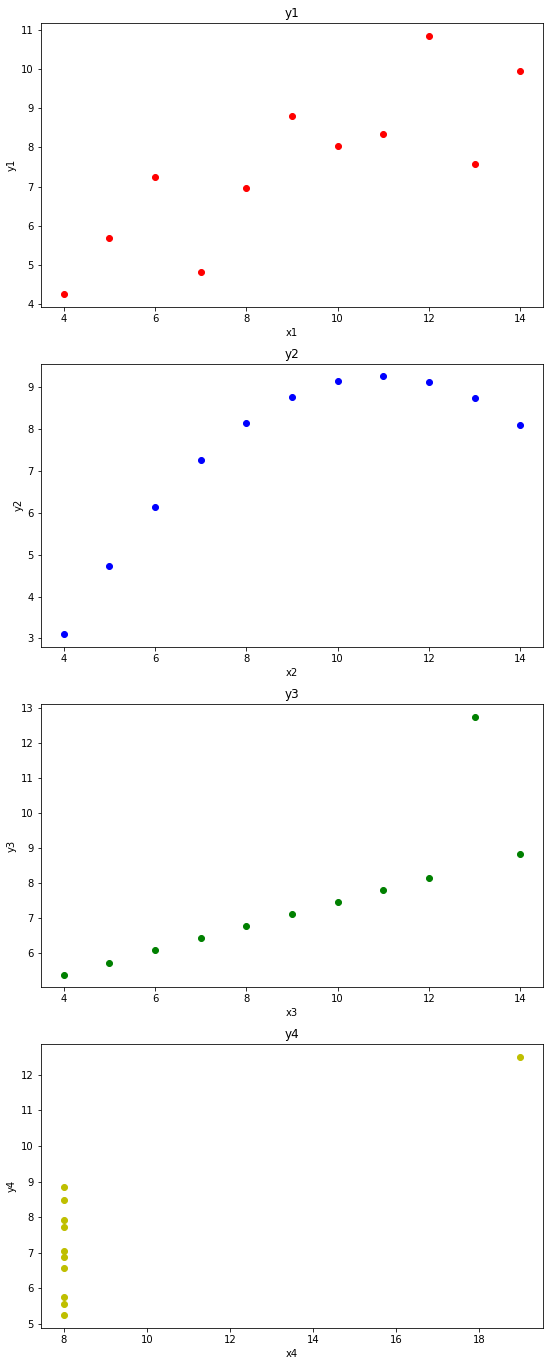

In [124]:
fig = plt.figure()
fig.set_size_inches(9, 24)
col = ['r', 'b', 'g', 'y']
for i in range(1, 5):
    ax = fig.add_subplot(4, 1, i)
    x = np.array(s["x"+str(i)])
    y = np.array(s["y"+str(i)])
    ax.scatter(x, y, c=col[i-1])
    ax.set(title = "y"+str(i))
    ax.set(xlabel = "x"+str(i))
    ax.set(ylabel = "y"+str(i))
plt.show()